# Download and import the [Data Science Job Salary dataset](https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%204%20-%20Data%20Understanding/W4D4%20-%20Data%20Preprocessing%20&%20T/Data%20Science%20Job%20Salary%20dataset.zip).

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('datascience_salaries.csv')

df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


# Normalize the ‘salary’ column using Min-Max normalization which scales all salary values between 0 and 1. 

As a reminder, normalization is crucial when dealing with data that has different ranges. For example, salary data might have a wide range (e.g., from $20,000 to $200,000). By scaling the data using Min-Max normalization, you make sure that all salary values fall within a consistent range (0 to 1). This is particularly helpful when the data is going to be used in machine learning models, as some algorithms (like k-nearest neighbors or neural networks) perform better when features are normalized. It ensures that no single salary dominates the learning process, making the analysis more balanced.

In [2]:
# instantiate scaler
scaler = MinMaxScaler()

df['salary_scaled'] = scaler.fit_transform(df[['salary']])

df.describe()

,Unnamed: 0,salary,salary_scaled
count,1171.000000,1171.000000,1171.000000
mean,931.620837,64836.037575,0.175940
std,647.445266,32551.767046,0.164403
min,0.000000,30000.000000,0.000000
25%,364.500000,45000.000000,0.075758
50%,815.000000,63000.000000,0.166667
75%,1504.500000,68000.000000,0.191919
max,2259.000000,228000.000000,1.000000


# Implement dimensionality reduction like Principal Component Analysis (PCA) or t-SNE to reduce the number of features (columns) in the dataset.

Dimensionality reduction helps simplify complex datasets by reducing the number of variables under consideration. This can make the data more manageable and help avoid the curse of dimensionality—a phenomenon where machine learning models struggle when dealing with high-dimensional data.
PCA, for instance, helps in retaining the most important information (variance) from the dataset while reducing noise and redundancy.
It can also speed up the training process for models and help in visualizing data in fewer dimensions.

In [3]:
# we won't need this column:
df.pop('salary')
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary_scaled
0,0,Data scientist,Full Time,Senior,New York City,USD,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,0.601010


In [4]:
# need apply encoding
categorical_columns = ['job_title', 'job_type', 'experience_level', 'location', 'salary_currency']

# Convert categories into binary columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()

,Unnamed: 0,salary_scaled,job_title_Data analyst,job_title_Data scientist,job_title_ML Ops,job_title_Machine learning,job_type_Internship,experience_level_Executive,experience_level_Mid,experience_level_Senior,...,location_Wien,location_Wilmington,location_Work from Home,location_Wrocław,location_Zurich,location_tel aviv,location_České Budějovice,location_İstanbul,salary_currency_GBP,salary_currency_USD
0,0,0.601010,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2,0.454545,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,3,0.191919,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,0.454545,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,0.601010,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


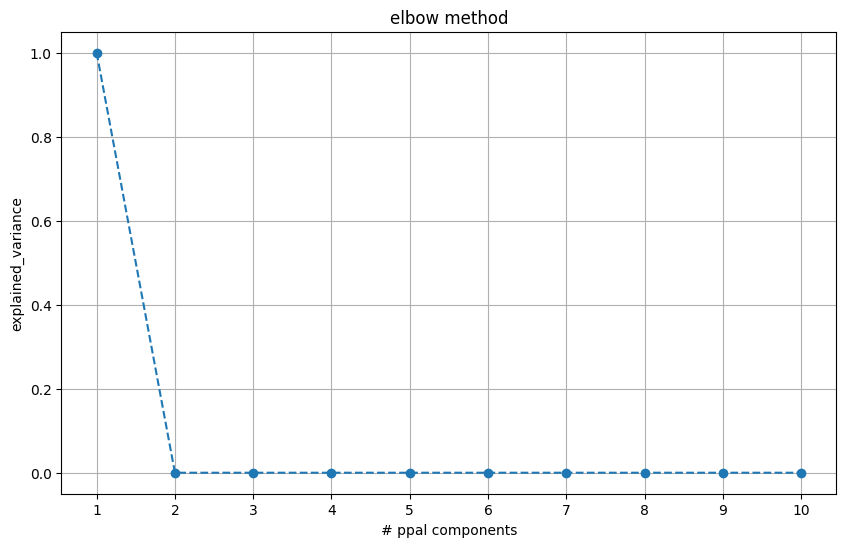

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# cols to reduce
features = df_encoded.drop('salary_scaled', axis=1)

# instantiate PCA
pca = PCA()

# apply PCA
principal_components = pca.fit_transform(features)

# need explained variance
explained_variance = pca.explained_variance_ratio_

# reduce amount of components to show
num_components_to_show = min(10, len(explained_variance))

# elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components_to_show + 1), explained_variance[:num_components_to_show], marker='o', linestyle='--')
plt.title('elbow method')
plt.xlabel('# ppal components')
plt.ylabel('explained_variance')
plt.xticks(range(1, num_components_to_show + 1))
plt.grid()
plt.show()

In [17]:
# instantiate PCA
pca = PCA(n_components=2) # 2 is the magic number

# apply PCA
principal_components = pca.fit_transform(features)

# new df
df_pca = pd.DataFrame(data=principal_components, columns=['x1', 'x2'])

df_pca['salary_scaled'] = df_encoded['salary_scaled'].values

print(df_pca)

               x1        x2  salary_scaled
0     -931.621010  0.615935       0.601010
1     -929.621023  0.619318       0.454545
2     -928.621031  0.595245       0.191919
3     -927.621023  0.619315       0.454545
4     -926.621012  0.615927       0.601010
...           ...       ...            ...
1166  1311.378936  0.438800       1.000000
1167  1317.378924  0.447208       0.429293
1168  1318.378937  0.438201       0.232323
1169  1323.378948  0.481294       0.191919
1170  1327.378938  0.434025       0.530303

[1171 rows x 3 columns]


# Group the dataset by the ‘experience_level’ column and calculate the average and median salary for each experience level (e.g., Junior, Mid-level, Senior).

Aggregating data helps in understanding trends within subgroups of the dataset.
Calculating average and median salaries for each experience level gives insights into the compensation distribution and disparities across different job levels. This kind of aggregation can help in answering business questions like “How does salary evolve with experience?” or “What is the salary distribution for senior-level roles?”m

In [21]:
# reload 'df'
df = pd.read_csv('datascience_salaries.csv')

salary_stats = df.groupby('experience_level')['salary'].agg(['mean', 'median']).reset_index()

# renaming
salary_stats.columns = ['experience_level', 'average_salary', 'median_salary']

print(salary_stats)

  experience_level  average_salary  median_salary
0            Entry    36111.111111        30000.0
1        Executive    76076.923077        46000.0
2              Mid    51786.885246        51000.0
3           Senior    75088.033012        68000.0
